In [77]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from scipy.stats import sem
import matplotlib.cm as cm

In [78]:
plt.rcParams['font.family'] = 'sans-serif'

# Helper functions

In [79]:
def smooth(xs, ys, degree=8):
    poly = np.polyfit(xs, ys, degree)
    poly_y = np.poly1d(poly)(xs)
    return poly_y

def smooth(xs, ys):
    from scipy.signal import lfilter
    n = 5             # larger n gives smoother curves
    b = [1.0 / n] * n  # numerator coefficients
    a = 1              # denominator coefficient
    y_lf = lfilter(b, a, ys)
    return y_lf

def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

# Transfer Results

In [80]:
es = [10, 16, 32, 64]
ds = [10, 16, 32, 64]
zs = [4, 5, 6, 7, 8, 9, 10]

In [81]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [82]:
transfer_data = {
    'performance': [], 'dims': [], 'epochs': [], 'fname': [],
    'e': [], 'd': [], 'z': [], 'd/e': [], 'd/z': []
    }
epochs = [5, 10, 30]
for e in es:
    for d in ds:
        for z in zs:
            transfer_dir = f'transfer_foraging4x4_simplest_e{e}d{d}_dim{z}'
            transfer_dir = f'{engram_dir}pickles/{transfer_dir}/'
            if not os.path.exists(transfer_dir):
                continue
            for pickle_file in os.listdir(transfer_dir):
                pickle_file = f'{transfer_dir}{pickle_file}'
                with open(pickle_file, 'rb') as f:
                    results = pickle.load(f)
                valid_scores = results['valid_scores']
                dimensionality_tracking = results['dimensionality_tracking']
                fnames = results['fname']
                n_fname = len(results['fname'])
                n_scores = len(results['valid_scores'])
                multiple = int(n_fname/n_scores)
                for idx in range(n_scores):
                    perf = valid_scores[idx]
                    dim = dimensionality_tracking[idx]
                    fname = fnames[idx*multiple]
                    if fname.endswith('mb_only'):
                        fname = 'MB only'
                    elif 'mb' in fname:
                        fname = 'MB'
                    elif 'mf' in fname:
                        fname = 'MF'
                    elif 'entro' in fname:
                        fname = 'Entro'
                    elif 'clean' in fname:
                        fname = 'Random'
                    for epoch in epochs:
                        transfer_data['performance'].append(perf[epoch-1])
                        transfer_data['dims'].append(dim)
                        transfer_data['epochs'].append(epoch)
                        transfer_data['fname'].append(fname)
                        transfer_data['e'].append(e)
                        transfer_data['d'].append(d)
                        transfer_data['z'].append(z)
                        transfer_data['d/e'].append(d/e)
                        transfer_data['d/z'].append(d/z)
transfer_df = pd.DataFrame(transfer_data)

In [69]:
results.keys()

dict_keys(['dimensionality_tracking', 'dimensionality_variance_ratio', 'valid_scores', 'iteration', 'valid_eps', 'training_eps', 'epochs', 'fname', 'loss_weights'])

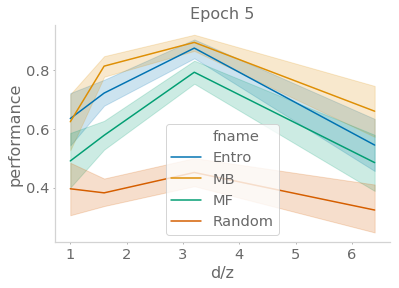

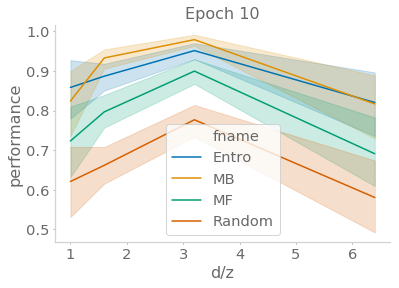

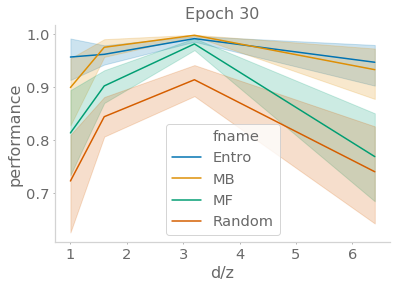

In [76]:
for epoch in epochs:
    fig, ax = plt.subplots()
    sns.lineplot(
        x='d/z', y='performance', hue='fname', ax=ax,
        data=transfer_df[(transfer_df['z']==z) & (transfer_df['epochs']==epoch)]
        )
    plt.title(f'Epoch {epoch}')

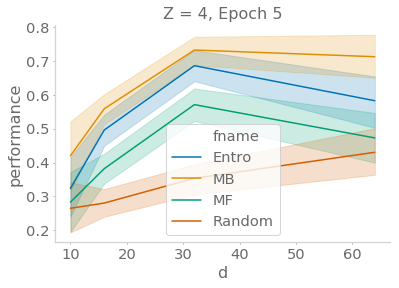

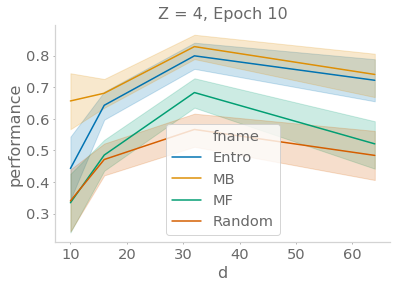

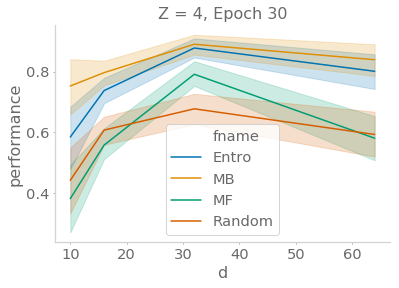

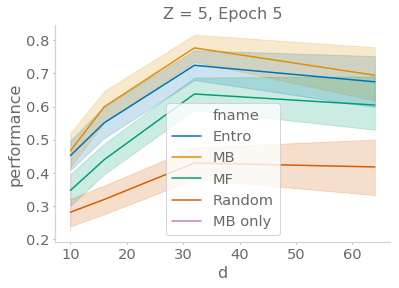

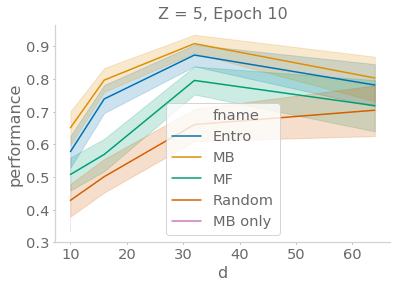

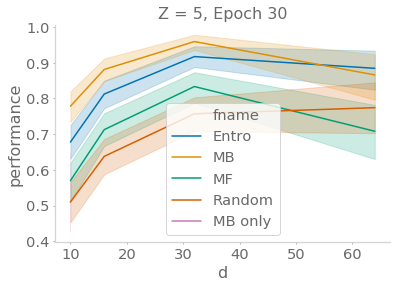

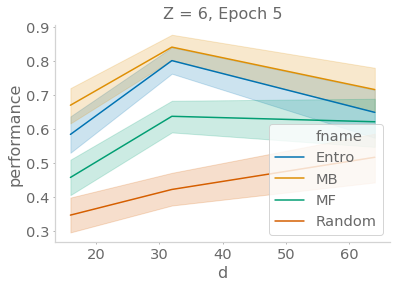

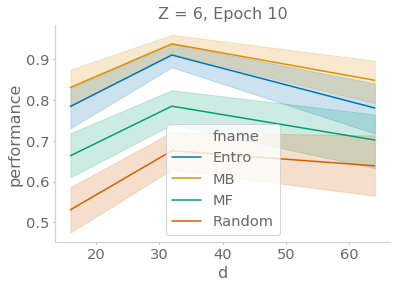

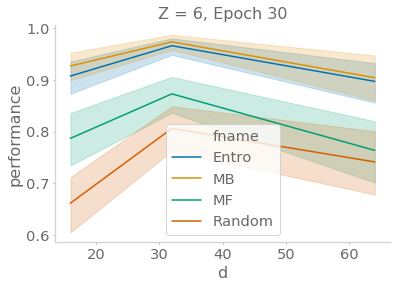

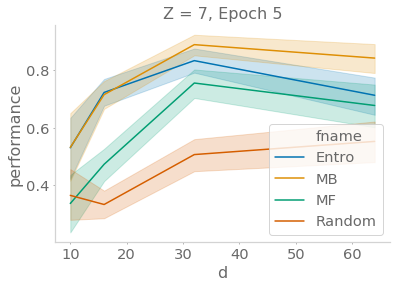

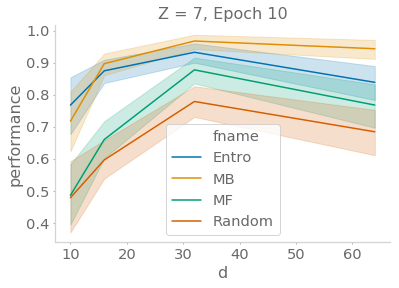

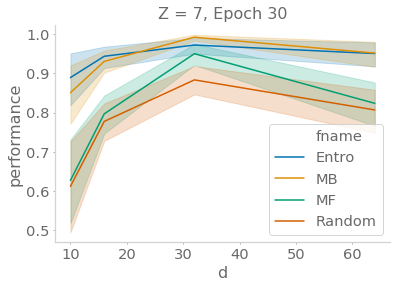

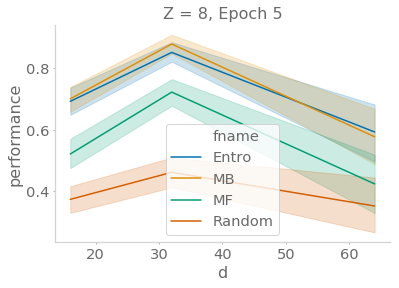

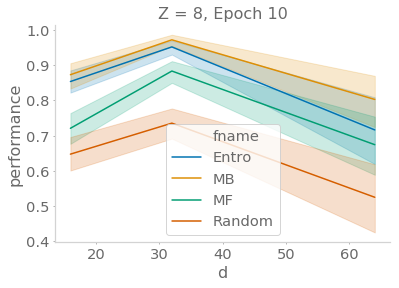

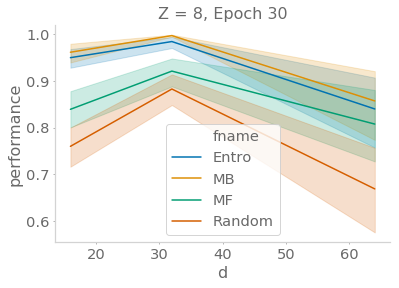

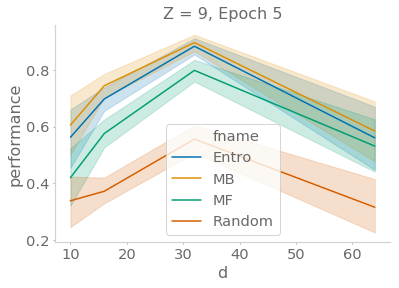

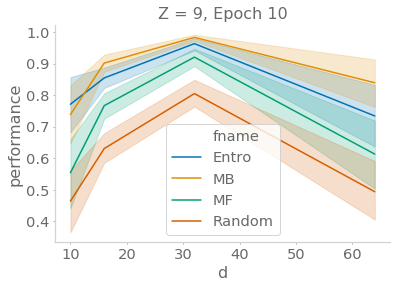

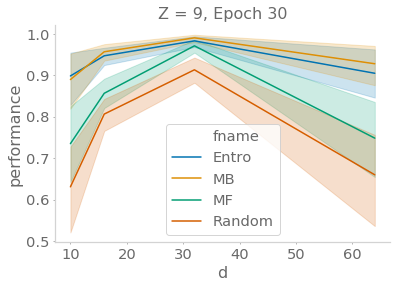

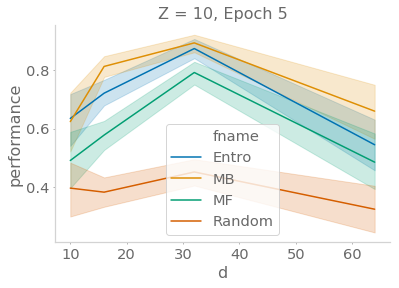

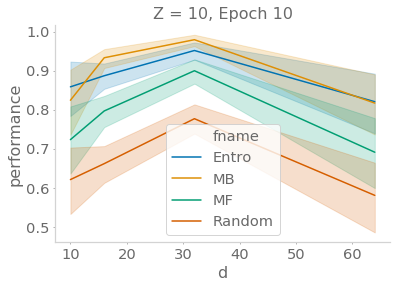

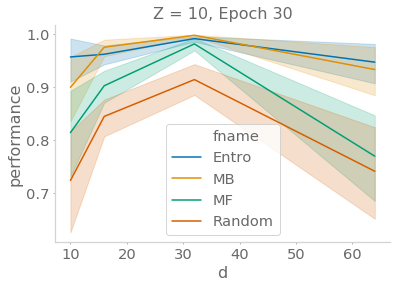

In [71]:
for z in zs:
    for epoch in epochs:
        fig, ax = plt.subplots()
        sns.lineplot(
            x='d', y='performance', hue='fname', ax=ax,
            data=transfer_df[(transfer_df['z']==z) & (transfer_df['epochs']==epoch)]
            )
        plt.title(f'Z = {z}, Epoch {epoch}')

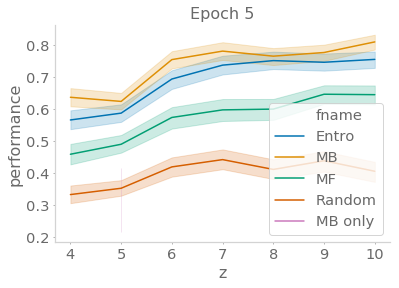

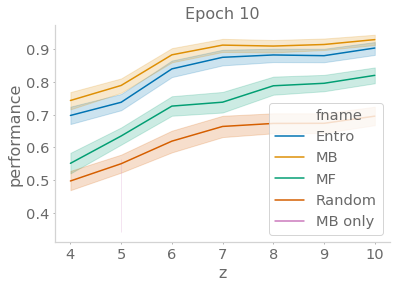

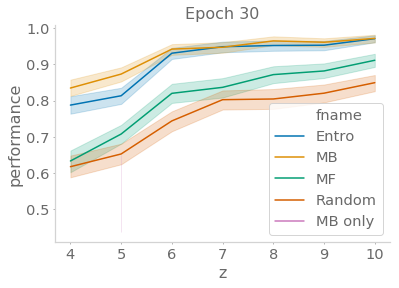

In [72]:
for epoch in epochs:
    fig, ax = plt.subplots()
    sns.lineplot(
        x='z', y='performance', hue='fname', ax=ax,
        data=transfer_df[transfer_df['epochs']==epoch]
        )
    plt.title(f'Epoch {epoch}')

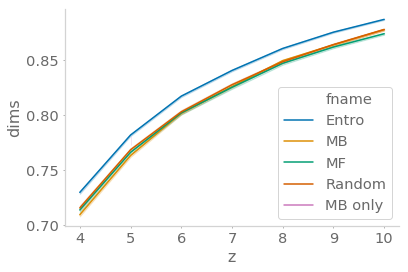

In [73]:
fig, ax = plt.subplots()
sns.lineplot(
    x='z', y='dims', hue='fname', ax=ax,
    data=transfer_df[transfer_df['epochs']==epochs[-1]]
    )

# Task A Results

In [55]:
es = [10, 16, 32, 64]
ds = [10, 16, 32, 64]
zs = [4, 5, 6, 7, 8, 9, 10]

In [56]:
taskA_data = {
    'performance': [], 'dims': [], 'epochs': [], 'fname': [],
    'e': [], 'd': [], 'z': [], 'd/e': [], 'd/z': []
    }
epochs = [5, 10, 30]
for e in es:
    for d in ds:
        for z in zs:
            transfer_dir = f'foraging4x4_simplest_e{e}d{d}_dim{z}'
            transfer_dir = f'{engram_dir}pickles/{transfer_dir}/'
            if not os.path.exists(transfer_dir):
                continue
            for pickle_file in os.listdir(transfer_dir):
                pickle_file = f'{transfer_dir}{pickle_file}'
                with open(pickle_file, 'rb') as f:
                    results = pickle.load(f)
                valid_scores = results['valid_scores']
                dimensionality_tracking = results['dimensionality_tracking']
                for idx in range(len(valid_scores)):
                    perf = valid_scores[idx]
                    dim = dimensionality_tracking[idx]
                    fname = results['fname'][idx]
                    for epoch in epochs:
                        taskA_data['performance'].append(perf[epoch-1])
                        taskA_data['dims'].append(dim)
                        taskA_data['epochs'].append(epoch)
                        taskA_data['fname'].append(fname)
                        taskA_data['e'].append(e)
                        taskA_data['d'].append(d)
                        taskA_data['z'].append(z)
                        taskA_data['d/e'].append(d/e)
                        taskA_data['d/z'].append(d/z)
taskA_df = pd.DataFrame(taskA_data)

In [44]:
results.keys()

dict_keys(['dimensionality_tracking', 'dimensionality_variance_ratio', 'valid_scores', 'iteration', 'valid_eps', 'training_eps', 'epochs', 'fname', 'loss_weights'])

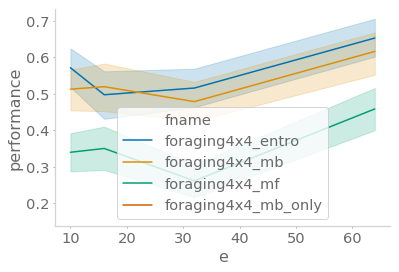

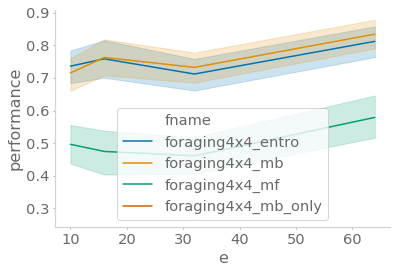

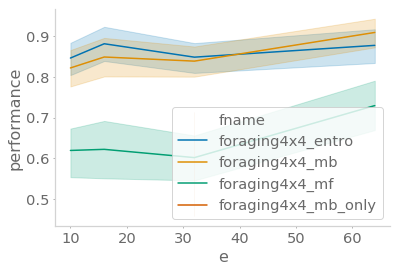

In [45]:
z = 5
for epoch in epochs:
    fig, ax = plt.subplots()
    sns.lineplot(
        x='e', y='performance', hue='fname', ax=ax,
        data=taskA_df[(taskA_df['z']==z) & (taskA_df['epochs']==epoch)]
        )

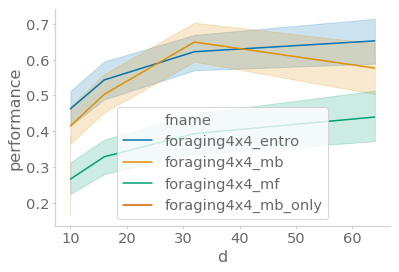

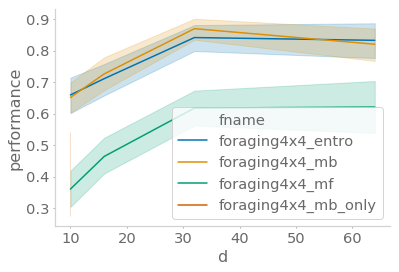

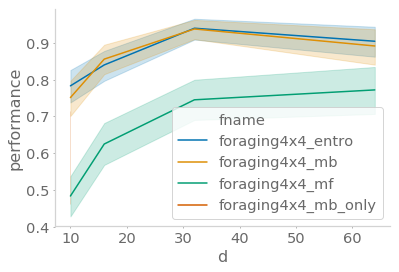

In [46]:
z = 5
for epoch in epochs:
    fig, ax = plt.subplots()
    sns.lineplot(
        x='d', y='performance', hue='fname', ax=ax,
        data=taskA_df[(taskA_df['z']==z) & (taskA_df['epochs']==epoch)]
        )

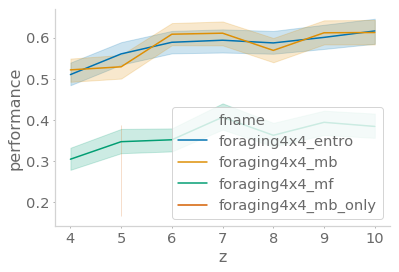

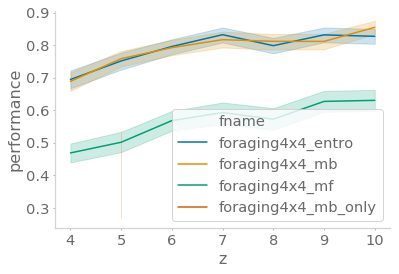

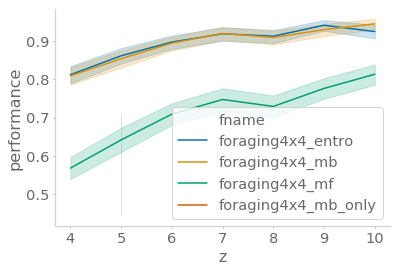

In [47]:
for epoch in epochs:
    fig, ax = plt.subplots()
    sns.lineplot(
        x='z', y='performance', hue='fname', ax=ax,
        data=taskA_df[taskA_df['epochs']==epoch]
        )

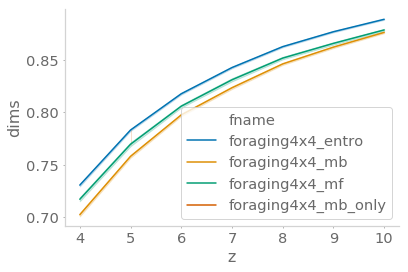

In [48]:
fig, ax = plt.subplots()
sns.lineplot(
    x='z', y='dims', hue='fname', ax=ax,
    data=taskA_df[taskA_df['epochs']==epochs[-1]]
    )